# 과제#2. 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)

######################################################################################################## 데이터 drop && 일부 수치화
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data["OverTime"] = np.where(data['OverTime']=='Yes', 1, 0)
data["Gender"] = np.where(data['Gender']=='Male', 1, 0)
data["JobRole"] = np.where(data['JobRole'].isin(["Laboratory Technician","Human Resources",
                                                "Sales Executive,""Sales Representative","Research Scientist"]), 1, 0)
data = pd.get_dummies(data=data, columns=["MaritalStatus"], drop_first=True)
data["NumCompaniesWorked"] =np.where(data["NumCompaniesWorked"]<2, 1,0)

#########################################################################################################################################

data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,MaritalStatus_Married,MaritalStatus_Single
0,0,33,7.0,1,0,3,11691,1,0,11,4,14,4,1,0
1,0,35,18.0,1,0,4,9362,0,0,11,3,10,3,0,1
2,0,42,6.0,1,0,1,13348,0,0,13,2,18,4,1,0
3,0,46,2.0,0,0,1,17048,0,0,23,1,28,3,1,0
4,0,39,NaN,1,0,4,4127,0,0,18,4,7,3,0,0
5,1,22,4.0,1,1,3,3894,0,0,16,3,4,3,0,1
6,0,24,21.0,1,1,1,2296,1,0,14,2,2,3,0,0
7,0,34,8.0,1,1,3,4404,0,0,12,1,6,4,1,0
8,0,30,20.0,1,0,1,9957,1,0,15,3,7,2,1,0
9,0,26,6.0,0,1,4,2659,1,1,13,3,3,3,1,0


In [3]:
data["JobRole"].unique()

array([0, 1])

|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [4]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [5]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [6]:
x.head()

,Age,DistanceFromHome,Gender,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,MaritalStatus_Married,MaritalStatus_Single
0,33,7.0,1,0,3,11691,1,0,11,4,14,4,1,0
1,35,18.0,1,0,4,9362,0,0,11,3,10,3,0,1
2,42,6.0,1,0,1,13348,0,0,13,2,18,4,1,0
3,46,2.0,0,0,1,17048,0,0,23,1,28,3,1,0
4,39,NaN,1,0,4,4127,0,0,18,4,7,3,0,0


* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

In [7]:
# 2번째 코드에 데이터에 제거 및 수정 했습니다.

In [8]:
x = x.astype(float)

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [9]:
print("전체 데이터 : ",len(x))

전체 데이터 :  1250


In [10]:
data.isna().sum()

Attrition                    0
Age                          0
DistanceFromHome            54
Gender                       0
JobRole                      0
JobSatisfaction              0
MonthlyIncome                0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
TotalWorkingYears            0
WorkLifeBalance              0
MaritalStatus_Married        0
MaritalStatus_Single         0
dtype: int64

#### 2.2.1 결측지 KNNImputer

In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputed = imputer.fit_transform(x)
# 데이터프레임으로 다시 만듭시다.
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

Age                         0
DistanceFromHome            0
Gender                      0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
TotalWorkingYears           0
WorkLifeBalance             0
MaritalStatus_Married       0
MaritalStatus_Single        0
dtype: int64

* 특정 값으로 채우기 : simpleimputer

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [12]:
# 2번째 코드에 data에 수행했습니다.

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [13]:
from sklearn.model_selection import train_test_split

# KNNImputer 데이터 훈련 데이터 셋 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=200, random_state=2022)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=200, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [14]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [17]:
result={}

In [18]:
# LogisticRegression
model_lr = LogisticRegression(max_iter=600)

#### (2) Decision Tree 모델링

In [19]:
#DecisionTreeClassifier Tuning

model_dtr = DecisionTreeClassifier(random_state=2022)

# 파라미터 선언
param = {
    "max_depth" : range(3,21)
}

# Grid Search 모델 선언하기

model_dt = GridSearchCV(model_dtr,
                    param,
                    cv=5,
                    scoring='accuracy',
                    verbose=2)

#### (3) KNN 모델링

In [20]:
# KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)

#### (4) SVM 모델링

In [21]:
mode_svc = SVC()
params = {'C':[0.05, 0.1,0.2,1,5,10], 'gamma': [0.1,1,5,10]}
m_svm_gs = GridSearchCV(mode_svc, param_grid = params, cv = 5, scoring = "accuracy")

#### (5) Random Forest 모델링

In [22]:
model_rf = RandomForestClassifier()

#### (6) XGB 모델링

In [23]:
m_xgb = XGBClassifier(objective='binary:logistic')

In [24]:
param_xgb ={'max_depth': range(3, 11),
           "learning_rate":[0.01,0.1,0.2,0.3]}

m_xgb_gs =GridSearchCV(m_xgb, param_xgb, cv=10, scoring="r2",n_jobs=4)

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [25]:
from tensorflow import keras
from keras.backend import clear_session
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping

In [26]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [27]:
input = x_train.shape[1]
batch = 64
epochs = 300

In [28]:
x_train.shape, y_test.shape

((850, 14), (200,))

* 모델1 

In [29]:
clear_session()

il = Input(shape=(x_train.shape[1],))
ol = Dense(1, activation="sigmoid")(il)

model1 = keras.models.Model(il,ol)
model1.compile(loss =binary_crossentropy, optimizer = 'adam',metrics=["accuracy"]) 
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* 모델2

In [30]:
clear_session()

il = Input(shape=(x_train.shape[1],))
hl = Dense(28,activation="relu")(il)
hl = Dense(14,activation="relu")(hl)
hl = Dense(7,activation="relu")(hl)
ol = Dense(1,activation="sigmoid")(il)

model2 = keras.models.Model(il,ol)
model2.compile(loss =binary_crossentropy, optimizer = 'adam',metrics=["accuracy"]) 
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


* 모델3

In [31]:
clear_session()

il = Input(shape=(x_train.shape[1],))
hl = Dense(64,activation="relu")(il)
hl = Dense(32,activation="relu")(hl)
hl = Dense(16,activation="relu")(hl)
hl = Dense(8,activation="relu")(hl)
hl = Dense(4,activation="relu")(hl)
ol = Dense(1,activation="sigmoid")(il)

model3 = keras.models.Model(il,ol)
model3.compile(loss =binary_crossentropy, optimizer = 'adam',metrics=["accuracy"]) 
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


##### 4.3.1 Logistic Regression 학습 및 최적화

In [32]:
# KNNImputer 데이터 훈련
model_lr.fit(x_train,y_train)
y_lr_pred = model_lr.predict(x_val)
print(classification_report(y_val,y_lr_pred))
print(confusion_matrix(y_val,y_lr_pred))
# result["LogisticRegression_KNNimputer"]=accuracy_score(y_test,y_lr_pred)
result["LogisticRegression_KNNimputer"]=[accuracy_score(y_val,y_lr_pred),f1_score(y_val,y_lr_pred)]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       176
           1       0.57      0.17      0.26        24

    accuracy                           0.89       200
   macro avg       0.73      0.57      0.60       200
weighted avg       0.86      0.89      0.86       200

[[173   3]
 [ 20   4]]


##### 4.3.2 Decision Tree 학습 및 최적화

In [38]:
# KNNImputer 데이터 훈련
model_dt.fit(x_tr_n,y_train)
y_dtr_pred = model_dt.predict(x_te_n)
print("Best Estimatior :",model_dt.best_estimator_)

print(confusion_matrix(y_test,y_dtr_pred))
print(classification_report(y_test,y_dtr_pred))
result["DecisionTree"] = [accuracy_score(y_test,y_dtr_pred),f1_score(y_test,y_dtr_pred)]


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................

##### 4.3.3KNN 학습 및 최적화

In [39]:
# KNNImputer 데이터 훈련
model_knn.fit(x_train, y_train)

y_knn_pred = model_knn.predict(x_val)
print(classification_report(y_val,y_knn_pred))
print(confusion_matrix(y_val,y_knn_pred))
result["KNN"] = [accuracy_score(y_test,y_knn_pred),f1_score(y_test,y_knn_pred)]

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       176
           1       0.14      0.04      0.06        24

    accuracy                           0.85       200
   macro avg       0.51      0.50      0.49       200
weighted avg       0.79      0.85      0.82       200

[[170   6]
 [ 23   1]]


##### 4.3.4 SVM 학습 및 최적화

In [40]:
m_svm_gs.fit(x_tr_n,y_train)
print(m_svm_gs.best_estimator_)
y_svc_pred = m_svm_gs.predict(x_te_n)
print(classification_report(y_test,y_svc_pred))
print(confusion_matrix(y_test,y_svc_pred))

result["SVR"] = [accuracy_score(y_test,y_svc_pred),f1_score(y_test,y_svc_pred)]

SVC(C=10, gamma=0.1)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       169
           1       0.71      0.32      0.44        31

    accuracy                           0.88       200
   macro avg       0.80      0.65      0.69       200
weighted avg       0.86      0.88      0.85       200

[[165   4]
 [ 21  10]]


In [41]:
##### 4.3.5 Random Forest 학습 및 최적화

In [42]:
model_rf.fit(x_train, y_train)
y_rf_pred = model_rf.predict(x_test)
print(classification_report(y_test,y_knn_pred))
print(confusion_matrix(y_test,y_knn_pred))
result["RandomForest"] = [accuracy_score(y_test,y_rf_pred),f1_score(y_test,y_rf_pred)]

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       169
           1       0.14      0.03      0.05        31

    accuracy                           0.82       200
   macro avg       0.49      0.50      0.48       200
weighted avg       0.74      0.82      0.77       200

[[163   6]
 [ 30   1]]


##### 4.3.6 XGB 학습 및 최적화

In [86]:
m_xgb_gs.fit(x_train,y_train)
print(m_xgb_gs.best_params_)
y_xgb_pred = m_xgb_gs.predict(x_test)
print(classification_report(y_test,y_xgb_pred))
print(confusion_matrix(y_test,y_xgb_pred))
result["XGB"] = [accuracy_score(y_test,y_xgb_pred),f1_score(y_test,y_xgb_pred)]

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.01, 'max_depth': 4}
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       169
           1       0.50      0.26      0.34        31

    accuracy                           0.84       200
   macro avg       0.69      0.61      0.63       200
weighted avg       0.82      0.84      0.82       200

[[161   8]
 [ 23   8]]


<BarContainer object of 14 artists>

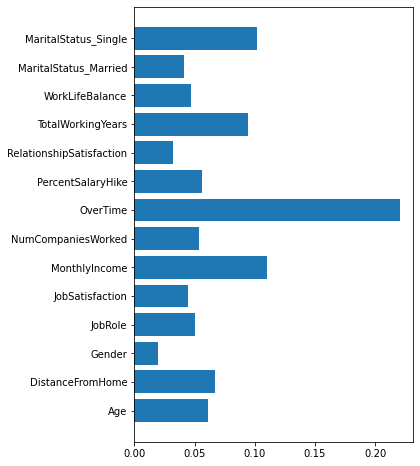

In [87]:
plt.figure(figsize=(5,8))
plt.barh(list(x),width=m_xgb_gs.best_estimator_.feature_importances_)

In [63]:
m_xgb_gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__objective', 'estimator__use_label_encoder', 'estimator__base_score', 'estimator__booster', 'estimator__colsample_bylevel', 'estimator__colsample_bynode', 'estimator__colsample_bytree', 'estimator__enable_categorical', 'estimator__gamma', 'estimator__gpu_id', 'estimator__importance_type', 'estimator__interaction_constraints', 'estimator__learning_rate', 'estimator__max_delta_step', 'estimator__max_depth', 'estimator__min_child_weight', 'estimator__missing', 'estimator__monotone_constraints', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__num_parallel_tree', 'estimator__predictor', 'estimator__random_state', 'estimator__reg_alpha', 'estimator__reg_lambda', 'estimator__scale_pos_weight', 'estimator__subsample', 'estimator__tree_method', 'estimator__validate_parameters', 'estimator__verbosity', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

#### 4.3.7 DL M1

In [44]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0,
                  patience=5,
                  restore_best_weights=True,
                  verbose=1)

In [45]:
# m1
model1.fit(x_train_s, y_train, epochs = epochs, validation_split=0.2, callbacks=[es],verbose=0)
val_pred_dl1 = model1.predict(x_val_s)

Restoring model weights from the end of the best epoch: 287.
Epoch 292: early stopping


In [46]:
for i in range(len(val_pred_dl1)):
    if val_pred_dl1[i]>=0.5:
        val_pred_dl1[i]=1
    else:
        val_pred_dl1[i]=0

In [47]:
result["DL3"] =[accuracy_score(y_val,val_pred_dl1),f1_score(y_val,val_pred_dl1)]

#### 4.3.7 DL M2

In [48]:
# m1
model2.fit(x_train_s, y_train, epochs = epochs, validation_split=0.2, callbacks=[es],verbose=0 )
val_pred_dl2 = model1.predict(x_val_s)

Restoring model weights from the end of the best epoch: 248.
Epoch 253: early stopping


In [49]:
for i in range(len(val_pred_dl2)):
    if val_pred_dl2[i]>=0.5:
        val_pred_dl2[i]=1
    else:
        val_pred_dl2[i]=0

In [50]:
result["DL2"] = [accuracy_score(y_val,val_pred_dl2),f1_score(y_val,val_pred_dl2)]

#### 4.3.7 DL M3

In [51]:
# m3
model3.fit(x_train_s, y_train, epochs = epochs, validation_split=0.2, callbacks=[es],verbose=0)
val_pred_dl3 = model3.predict(x_val_s)

Restoring model weights from the end of the best epoch: 232.
Epoch 237: early stopping


In [52]:
for i in range(len(val_pred_dl3)):
    if val_pred_dl3[i]>=0.5:
        val_pred_dl3[i]=1
    else:
        val_pred_dl3[i]=0

In [53]:
result["DL3"] =[accuracy_score(y_val,val_pred_dl3),f1_score(y_val,val_pred_dl3)]

## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

In [54]:
# 평가지표는 f1 score를 활용했습니다.
# 이유는 0과 1의 비율이 불균형이기 때문입니다.
# accuracy를 하게 되면 예측을 전부 0을 해도 8~90이 보장 되기 때문입니다.

### 5.2 성능 비교

In [33]:
print("Model \t\t acc \t\t f1")
for key, value in result.items():
    print("="*50)
    print(key,":",value)    
    print("="*50)

Model 		 acc 		 f1
LogisticRegression_KNNimputer : [0.885, 0.25806451612903225]


<AxesSubplot:xlabel='WorkLifeBalance'>

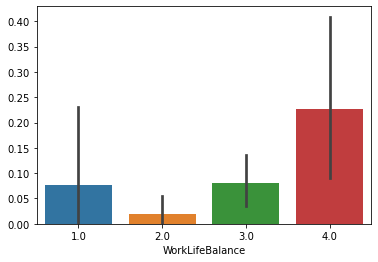

In [111]:
sns.barplot(x="WorkLifeBalance", y=y_xgb_pred, data=x_test)
# 현재까지 근무한 회사 수는 숫자형이었지만 0개 혹은 1개가 
# 압도적으로 이직율이 높아 2개미만으로 범주화 하여 전처리를 했다.

In [100]:
list(x_test)

['Age',
 'DistanceFromHome',
 'Gender',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'MaritalStatus_Married',
 'MaritalStatus_Single']